<a href="https://colab.research.google.com/github/Tarun280896/AI/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [2]:
f_mnist = keras.datasets.fashion_mnist

In [16]:
(train_X,train_y),(test_x,test_y) = f_mnist.load_data()

In [6]:
#the share of the image is 28x28
train_X.shape

(60000, 28, 28)

In [7]:
#there are 10 different classes of fashion
set(text_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

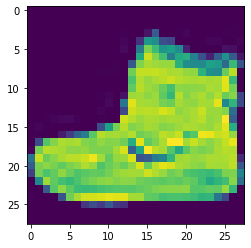

In [10]:
plt.imshow(train_X[0])#its an ancle boot

In [33]:
train_X = train_X/255.0
test_x = test_x/255.0 

**Simple model:**

In [38]:
def get_model():
  model = Sequential()
  #flattens the 28x28 array into linear array
  model.add(Flatten(input_shape = (28, 28)))
  #no of hidden layers = 1 with 128 neurons
  model.add(Dense(units = 128, activation= 'relu'))
  model.add(Dense(units = 64, activation= 'relu'))
  model.add(Dense(units = 32, activation= 'relu'))
  #total no of classes is 10
  model.add(Dense(units=10, activation='softmax'))
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model 

In [39]:
model = get_model()
model.fit(train_X,train_y,epochs=10, validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6783 - accuracy: 0.7640 - val_loss: 0.4023 - val_accuracy: 0.8510
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8590 - val_loss: 0.3811 - val_accuracy: 0.8640
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3454 - accuracy: 0.8732 - val_loss: 0.3731 - val_accuracy: 0.8594
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3206 - accuracy: 0.8809 - val_loss: 0.3677 - val_accuracy: 0.8648
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.8882 - val_loss: 0.3441 - val_accuracy: 0.8745
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.8909 - val_loss: 0.3449 - val_accuracy: 0.8798
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2773 - accuracy: 0.8962 - val_loss: 0.3360 - val_accuracy:

In [40]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.3439 - accuracy: 0.8804


[0.34389981627464294, 0.8804000020027161]

----------- Using call backs -----------

In [44]:
class CustomCallBack(keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs = {}):
    if logs.get('loss') < 0.2:
      print("Reached 80% accuracy on validation set")
      self.model.stop_training = True

In [45]:
callbacks = CustomCallBack()
model = get_model()
model.fit(train_X, train_y, epochs= 50, validation_split = .2, callbacks= [callbacks])

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7641 - accuracy: 0.7425 - val_loss: 0.4345 - val_accuracy: 0.8389
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4010 - accuracy: 0.8514 - val_loss: 0.3799 - val_accuracy: 0.8633
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3601 - accuracy: 0.8669 - val_loss: 0.3477 - val_accuracy: 0.8738
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3244 - accuracy: 0.8784 - val_loss: 0.3446 - val_accuracy: 0.8742
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3053 - accuracy: 0.8864 - val_loss: 0.3466 - val_accuracy: 0.8761
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2913 - accuracy: 0.8906 - val_loss: 0.3498 - val_accuracy: 0.8758
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.8962 - val_loss: 0.3165 - val_accuracy:

In [46]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3894 - accuracy: 0.8766


[0.3893781900405884, 0.8766000270843506]